In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
df= pd.read_csv('Crop_recommendation.csv')

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0



Counts for 'N':
count    2200.000000
mean       50.551818
std        36.917334
min         0.000000
25%        21.000000
50%        37.000000
75%        84.250000
max       140.000000
Name: N, dtype: float64


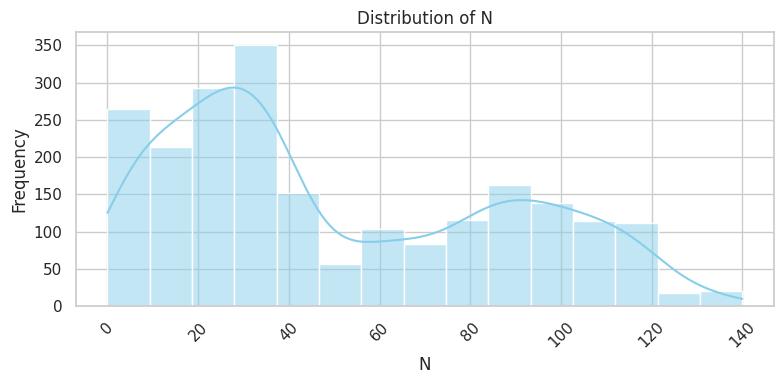


Counts for 'P':
count    2200.000000
mean       53.362727
std        32.985883
min         5.000000
25%        28.000000
50%        51.000000
75%        68.000000
max       145.000000
Name: P, dtype: float64


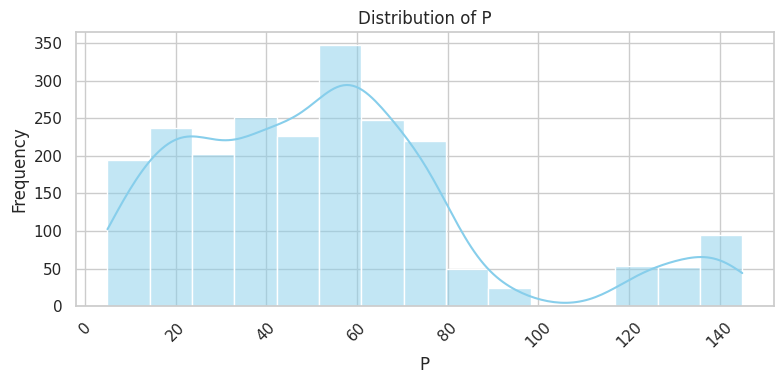


Counts for 'K':
count    2200.000000
mean       48.149091
std        50.647931
min         5.000000
25%        20.000000
50%        32.000000
75%        49.000000
max       205.000000
Name: K, dtype: float64


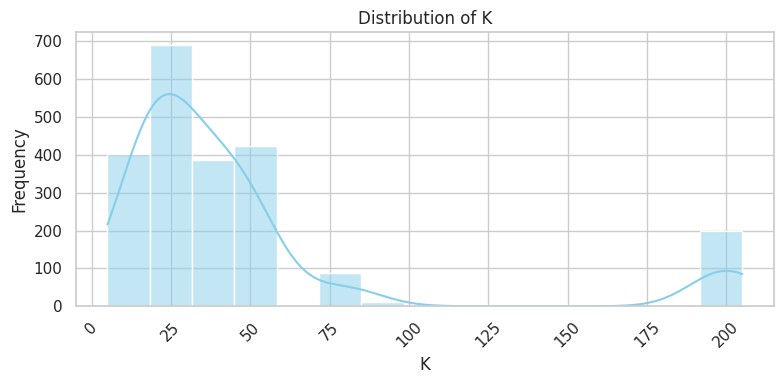


Counts for 'temperature':
count    2200.000000
mean       25.616244
std         5.063749
min         8.825675
25%        22.769375
50%        25.598693
75%        28.561654
max        43.675493
Name: temperature, dtype: float64


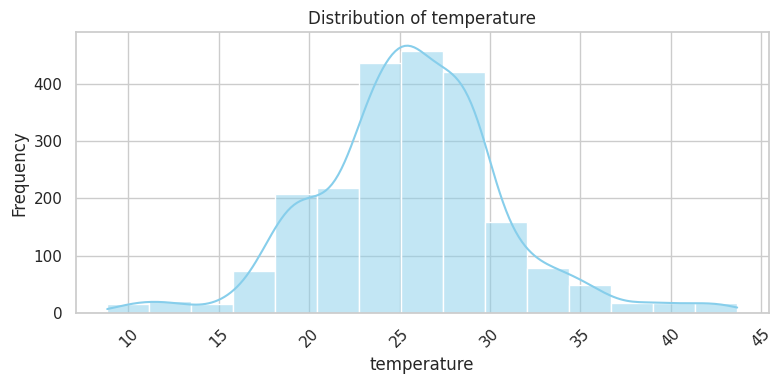


Counts for 'humidity':
count    2200.000000
mean       71.481779
std        22.263812
min        14.258040
25%        60.261953
50%        80.473146
75%        89.948771
max        99.981876
Name: humidity, dtype: float64


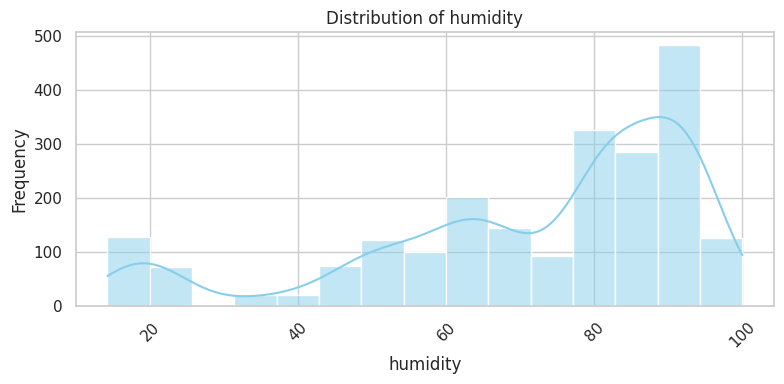


Counts for 'ph':
count    2200.000000
mean        6.469480
std         0.773938
min         3.504752
25%         5.971693
50%         6.425045
75%         6.923643
max         9.935091
Name: ph, dtype: float64


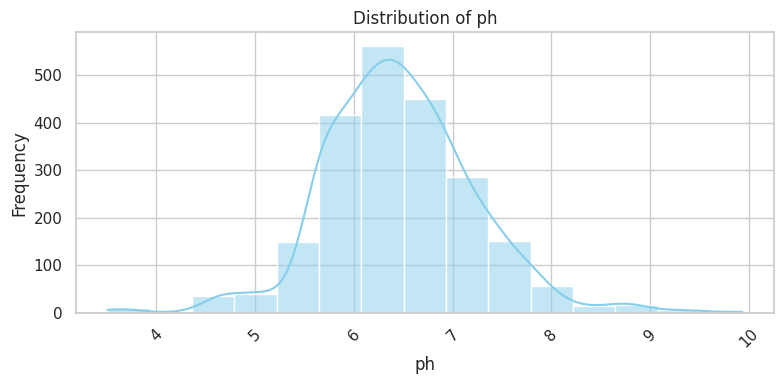


Counts for 'rainfall':
count    2200.000000
mean      103.463655
std        54.958389
min        20.211267
25%        64.551686
50%        94.867624
75%       124.267508
max       298.560117
Name: rainfall, dtype: float64


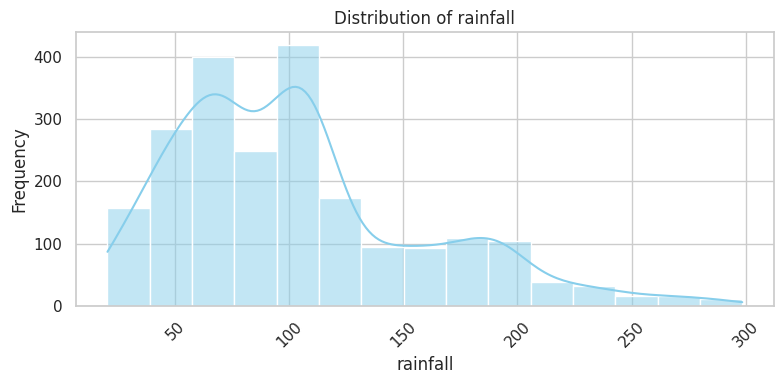


Counts for 'label':
label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100


<ipython-input-5-4729ac401a6d>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=column, palette='viridis')


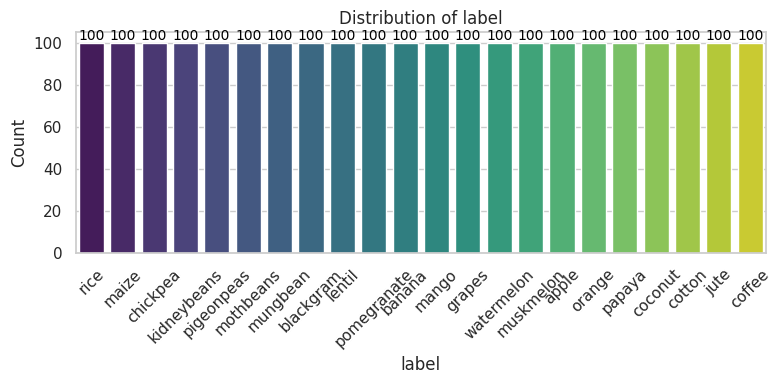

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distributions_with_counts(df):
    # Set the plot style
    sns.set(style="whitegrid")

    # Loop through each column in the dataset
    for column in df.columns:
        print(f"\nCounts for '{column}':")  # Print the counts for the column

        if df[column].dtype == 'object' or df[column].nunique() < 20:
            # Categorical or columns with fewer unique values
            counts = df[column].value_counts()
            print(counts.to_string())  # Print counts in tabular form

            plt.figure(figsize=(8, 4))  # Adjust the figure size
            ax = sns.countplot(data=df, x=column, palette='viridis')
            plt.title(f'Distribution of {column}')
            plt.ylabel('Count')
            plt.xlabel(column)

            # Annotate bars with counts
            for p in ax.patches:
                ax.annotate(f'{int(p.get_height())}',
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                            textcoords='offset points')

        else:
            # For numerical attributes
            print(df[column].describe())  # Print summary statistics for numerical columns

            plt.figure(figsize=(8, 4))  # Adjust the figure size
            sns.histplot(data=df, x=column, kde=True, color='skyblue', bins=15)
            plt.title(f'Distribution of {column}')
            plt.ylabel('Frequency')
            plt.xlabel(column)

        plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
        plt.tight_layout()  # Adjust layout to avoid overlap
        plt.show()

# Example usage
# Replace df with your actual dataset
# df = pd.read_csv('your_dataset.csv')
plot_distributions_with_counts(df)


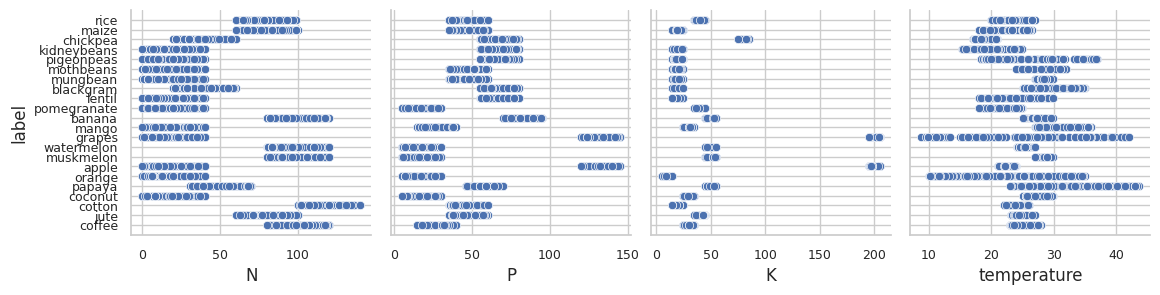

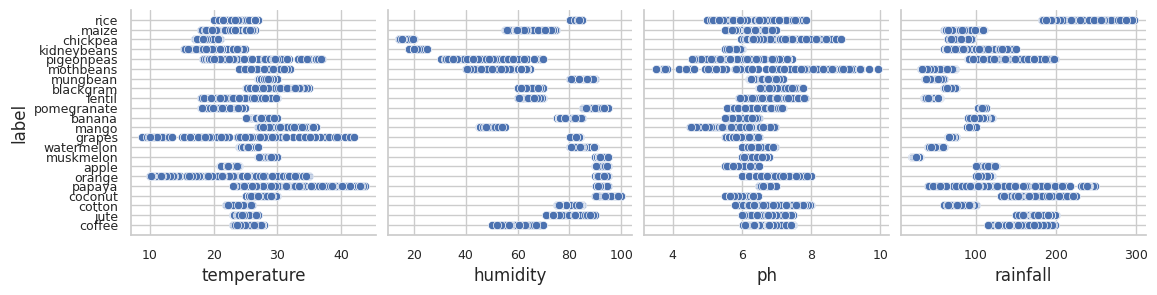

In [ ]:
for i in range(0, 6, 3):
   pplot = sns.pairplot(data=df,
                x_vars=df.columns[i:i+4],
                y_vars=['label'], height=3)
   pplot.tick_params(labelsize=9)

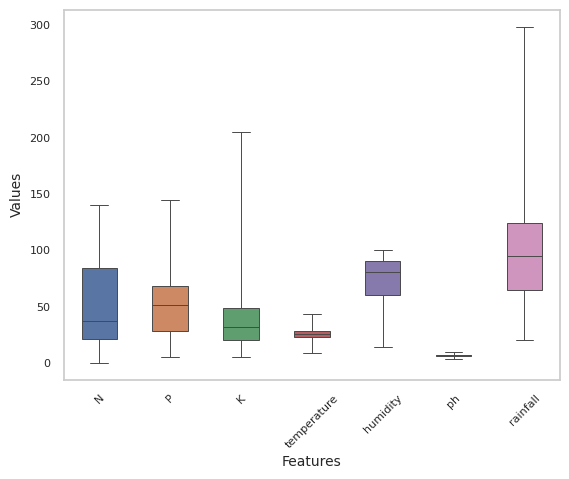

In [ ]:
  splot = sns.boxplot(data=df, whis=np.inf,
        width=0.5, linewidth = 0.7)

# Labels and clean up on the plot
splot.set_ylabel('Values', fontsize=10)
splot.set_xlabel('Features', fontsize=10)
splot.tick_params(labelsize=8)
splot.yaxis.grid(True, clip_on=False)
plt.xticks(rotation=45)
splot.grid(False)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'N'),
  Text(1.5, 0, 'P'),
  Text(2.5, 0, 'K'),
  Text(3.5, 0, 'temperature'),
  Text(4.5, 0, 'humidity'),
  Text(5.5, 0, 'ph'),
  Text(6.5, 0, 'rainfall')])

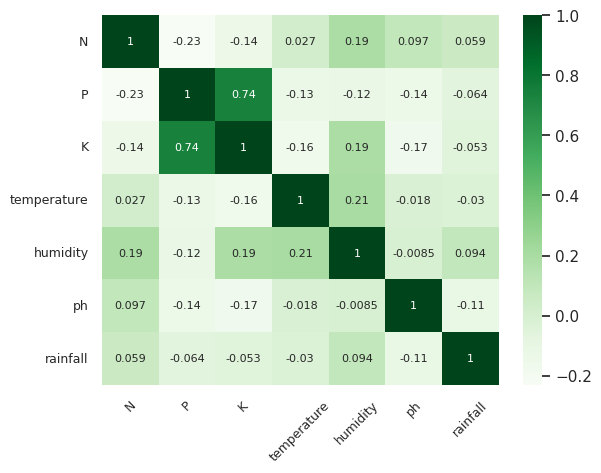

In [ ]:
df_2 = df.drop(columns=['label'])
cormat = df_2.corr()
round(cormat,2)
hplot = sns.heatmap(cormat,cmap="Greens", annot=True, annot_kws={"size": 8})
hplot.tick_params(labelsize=9)
plt.xticks(rotation=45)

In [ ]:
#Convert labels into categories codes
df['label'] = df['label'].astype('category')
df['response'] = df['label'].cat.codes  # Encoding labels as numeric values

# Declare and set X and y variables
y = df['response']
X = df.drop(['label', 'response'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Standardize the features (important for models like SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(kernel='linear', probability=True)
}


In [ ]:
for name, model in models.items():
    print(f"\n{name} Model Results:")
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test data

    # Compute evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", report)


Random Forest Model Results:
Accuracy: 0.9955
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
#Hyperparameter tuning for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7],  # Lower depth to prevent complexity
    'min_samples_split': [10, 20, 30],  # Larger split limits overfitting
    'min_samples_leaf': [5, 10, 20],  # Enforces minimum samples per leaf
    'ccp_alpha': [0.01, 0.05, 0.1]  # Stronger pruning
}


In [ ]:
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.01, 0.05, 0.1],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [10, 20, 30]},
             scoring='f1_weighted')

In [ ]:
# Best Decision Tree model
best_model = grid_search.best_estimator_


In [ ]:
# Train and predict
best_model.fit(X_train, y_train)
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)


In [ ]:
# Compute Training Metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

In [ ]:
# Compute Testing Metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

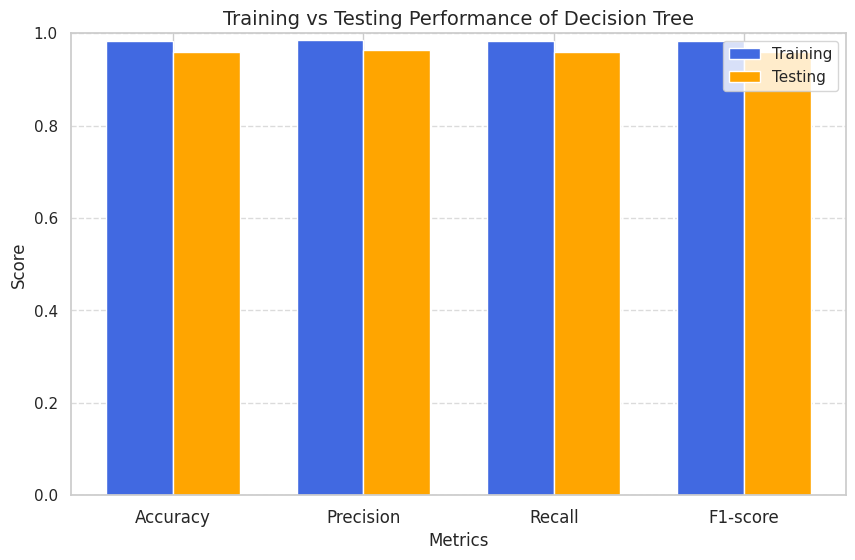

In [ ]:
# Bar Chart Visualization
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
train_scores = [train_accuracy, train_precision, train_recall, train_f1]
test_scores = [test_accuracy, test_precision, test_recall, test_f1]

x = np.arange(len(metrics))
width = 0.35  # Width of bars

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, train_scores, width, label='Training', color='royalblue')
plt.bar(x + width/2, test_scores, width, label='Testing', color='orange')

# Labeling
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Training vs Testing Performance of Decision Tree', fontsize=14)
plt.xticks(ticks=x, labels=metrics, fontsize=12)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


Best SVM Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


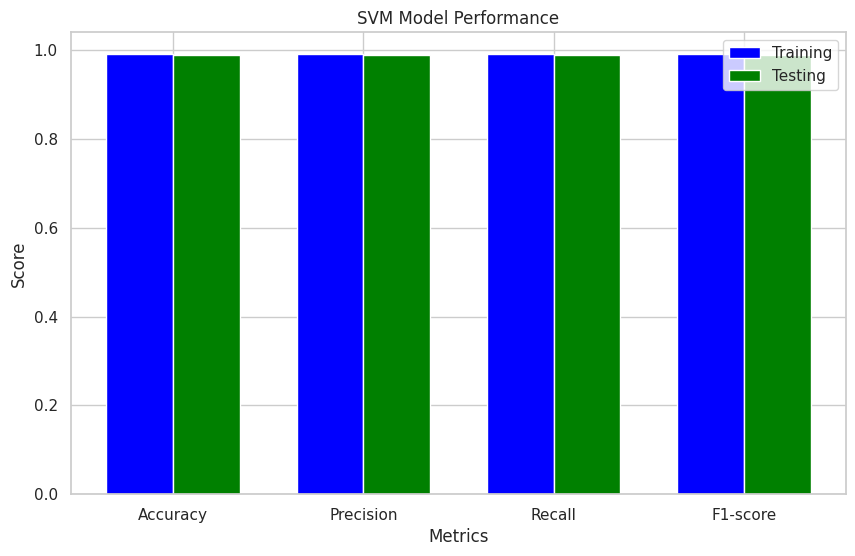

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Hyperparameter tuning for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Different kernel types
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

svm_model = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='f1_weighted', n_jobs=-1)
svm_model.fit(X_train, y_train)

# Best SVM model
best_svm = svm_model.best_estimator_

# Train and Predict
y_train_pred_svm = best_svm.predict(X_train)
y_test_pred_svm = best_svm.predict(X_test)

# Compute Training Metrics
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
train_precision_svm = precision_score(y_train, y_train_pred_svm, average='weighted')
train_recall_svm = recall_score(y_train, y_train_pred_svm, average='weighted')
train_f1_svm = f1_score(y_train, y_train_pred_svm, average='weighted')

# Compute Testing Metrics
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
test_precision_svm = precision_score(y_test, y_test_pred_svm, average='weighted')
test_recall_svm = recall_score(y_test, y_test_pred_svm, average='weighted')
test_f1_svm = f1_score(y_test, y_test_pred_svm, average='weighted')

# Show Best Parameters
print(f"Best SVM Parameters: {svm_model.best_params_}")

# Visualization
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
train_scores = [train_accuracy_svm, train_precision_svm, train_recall_svm, train_f1_svm]
test_scores = [test_accuracy_svm, test_precision_svm, test_recall_svm, test_f1_svm]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, train_scores, width, label='Training', color='blue')
plt.bar(x + width/2, test_scores, width, label='Testing', color='green')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('SVM Model Performance')
plt.xticks(ticks=x, labels=metrics)
plt.legend()
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [3, 5, 7],  # Limits tree depth
    'learning_rate': [0.01, 0.1, 0.2],  # Step size
    'subsample': [0.7, 1],  # Prevents overfitting
    'colsample_bytree': [0.7, 1]  # Random feature selection
}

xgb_model = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
                         param_grid_xgb, cv=5, scoring='f1_weighted', n_jobs=-1)
xgb_model.fit(X_train, y_train)

# Best XGBoost model
best_xgb = xgb_model.best_estimator_

# Train and Predict
y_train_pred_xgb = best_xgb.predict(X_train)
y_test_pred_xgb = best_xgb.predict(X_test)

# Compute Training Metrics
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
train_precision_xgb = precision_score(y_train, y_train_pred_xgb, average='weighted')
train_recall_xgb = recall_score(y_train, y_train_pred_xgb, average='weighted')
train_f1_xgb = f1_score(y_train, y_train_pred_xgb, average='weighted')

# Compute Testing Metrics
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
test_precision_xgb = precision_score(y_test, y_test_pred_xgb, average='weighted')
test_recall_xgb = recall_score(y_test, y_test_pred_xgb, average='weighted')
test_f1_xgb = f1_score(y_test, y_test_pred_xgb, average='weighted')

# Show Best Parameters
print(f"Best XGBoost Parameters: {xgb_model.best_params_}")

# Visualization
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
train_scores = [train_accuracy_xgb, train_precision_xgb, train_recall_xgb, train_f1_xgb]
test_scores = [test_accuracy_xgb, test_precision_xgb, test_recall_xgb, test_f1_xgb]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, train_scores, width, label='Training', color='blue')
plt.bar(x + width/2, test_scores, width, label='Testing', color='red')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('XGBoost Model Performance')
plt.xticks(ticks=x, labels=metrics)
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


KeyboardInterrupt: 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from lightgbm import LGBMClassifier
!pip install catboost

from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.2 MB/s eta 0:00:00


In [ ]:
# Define new models and their hyperparameters
additional_models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3),
    "LightGBM": LGBMClassifier(n_estimators=100, learning_rate=0.1),
    "CatBoost": CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, activation='relu', solver='adam'),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, learning_rate=0.1)
}

# Store evaluation metrics for new models
additional_metrics = {}

# Train each model and calculate metrics
for name, model in additional_models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    additional_metrics[name] = [accuracy, precision, recall, f1]

# Convert results to DataFrame
additional_metrics_df = pd.DataFrame(additional_metrics, index=["Accuracy", "Precision", "Recall", "F1 Score"])
print("\nAdditional Model Performance:\n", additional_metrics_df)


Training KNN...
Training Gradient Boosting...
Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000552 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1332
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.09104

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Training SVM...
Training Random Forest...
Training Logistic Regression...
Training XGBoost...
Training KNN...
Training Gradient Boosting...
Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1338
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.169004
[LightGBM] [Info] Start training from score -3.182610
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.018722
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1400x600 with 0 Axes>

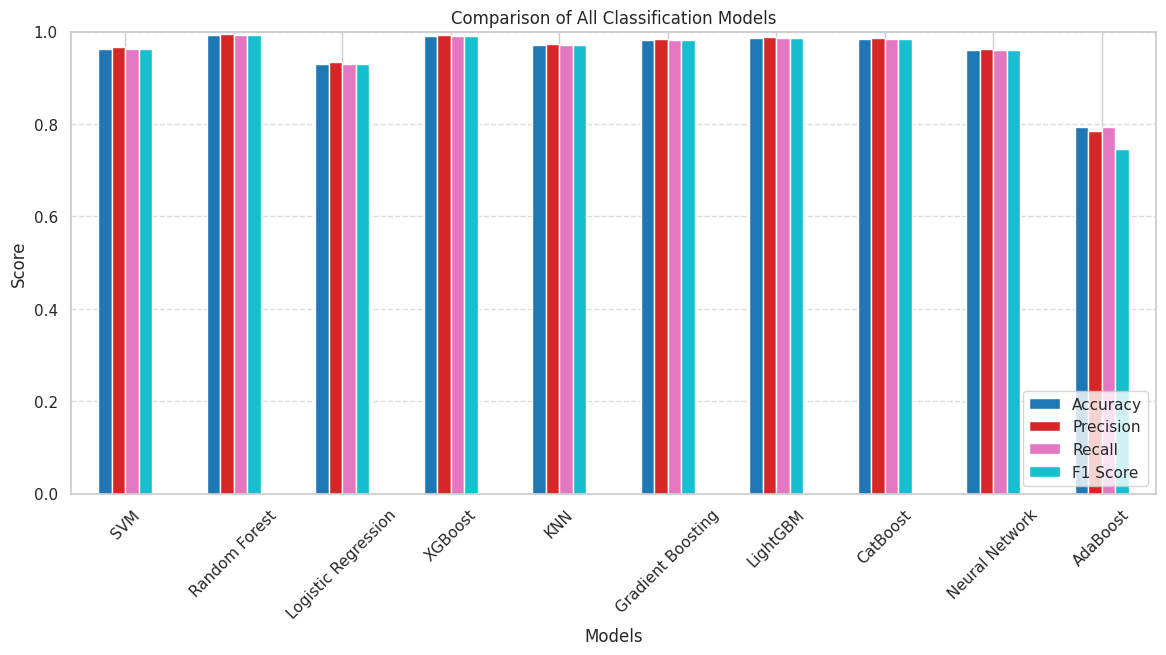

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import xgboost as xgb

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define all models
models = {
    "SVM": SVC(kernel='rbf', C=1.0, gamma='scale'),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, solver='liblinear'),
    "XGBoost": xgb.XGBClassifier(objective='multi:softmax', eval_metric='mlogloss', use_label_encoder=False),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3),
    "LightGBM": LGBMClassifier(n_estimators=100, learning_rate=0.1),
    "CatBoost": CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, activation='relu', solver='adam'),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, learning_rate=0.1)
}

# Store evaluation metrics
metrics = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    metrics[name] = [accuracy, precision, recall, f1]

# Convert results to a DataFrame
metrics_df = pd.DataFrame(metrics, index=["Accuracy", "Precision", "Recall", "F1 Score"])

# Print table
print("\nModel Performance:\n", metrics_df)

# Plot bar chart
plt.figure(figsize=(14, 6))
metrics_df.T.plot(kind='bar', figsize=(14, 6), colormap='tab10')
plt.title("Comparison of All Classification Models")
plt.xlabel("Models")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.show()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1338
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.169004
[LightGBM] [Info] Start training from score -3.182610
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.018722
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -2.984433
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.078620
[LightGBM] 

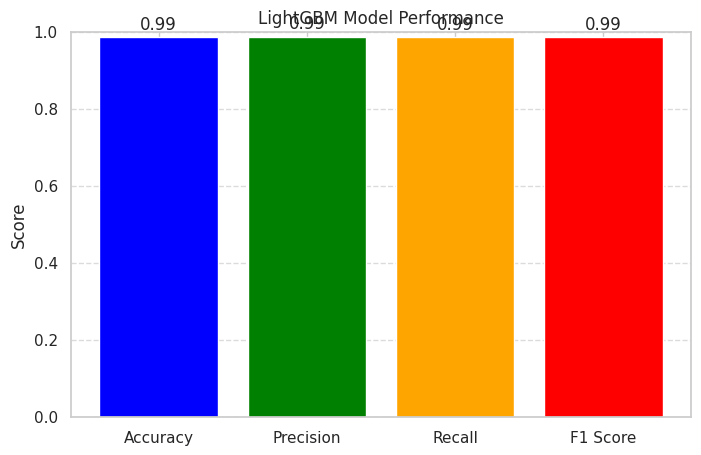

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize LightGBM model
lgbm = LGBMClassifier(n_estimators=100, learning_rate=0.1)

# Train the model
lgbm.fit(X_train, y_train)

# Make predictions
y_pred_lgbm = lgbm.predict(X_test)

# Calculate metrics
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
precision_lgbm = precision_score(y_test, y_pred_lgbm, average='weighted')
recall_lgbm = recall_score(y_test, y_pred_lgbm, average='weighted')
f1_lgbm = f1_score(y_test, y_pred_lgbm, average='weighted')

# Print results
print("📌 LightGBM Model Performance:")
print(f"🔹 Accuracy: {accuracy_lgbm:.4f}")
print(f"🔹 Precision: {precision_lgbm:.4f}")
print(f"🔹 Recall: {recall_lgbm:.4f}")
print(f"🔹 F1 Score: {f1_lgbm:.4f}")

# Plot the metrics
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
values = [accuracy_lgbm, precision_lgbm, recall_lgbm, f1_lgbm]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=["blue", "green", "orange", "red"])
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("LightGBM Model Performance")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show values on top of bars
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)

plt.show()


📌 Gradient Boosting Model Performance:
🔹 Accuracy: 0.9818
🔹 Precision: 0.9843
🔹 Recall: 0.9818
🔹 F1 Score: 0.9819


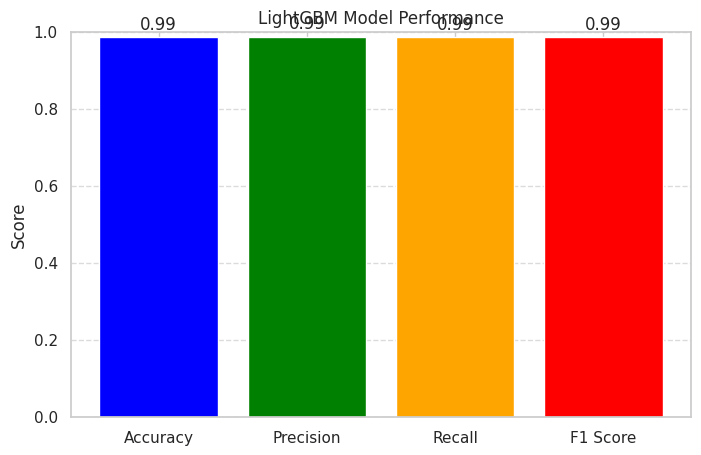

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting model
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# Train the model
gbm.fit(X_train, y_train)

# Make predictions
y_pred_gbm = gbm.predict(X_test)

# Calculate metrics
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm, average='weighted')
recall_gbm = recall_score(y_test, y_pred_gbm, average='weighted')
f1_gbm = f1_score(y_test, y_pred_gbm, average='weighted')

# Print results
print("📌 Gradient Boosting Model Performance:")
print(f"🔹 Accuracy: {accuracy_gbm:.4f}")
print(f"🔹 Precision: {precision_gbm:.4f}")
print(f"🔹 Recall: {recall_gbm:.4f}")
print(f"🔹 F1 Score: {f1_gbm:.4f}")
# Plot the metrics
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
values = [accuracy_lgbm, precision_lgbm, recall_lgbm, f1_lgbm]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=["blue", "green", "orange", "red"])
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("LightGBM Model Performance")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show values on top of bars
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)

plt.show()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1338
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.169004
[LightGBM] [Info] Start training from score -3.182610
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.018722
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -2.984433
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.078620
[LightGBM] 

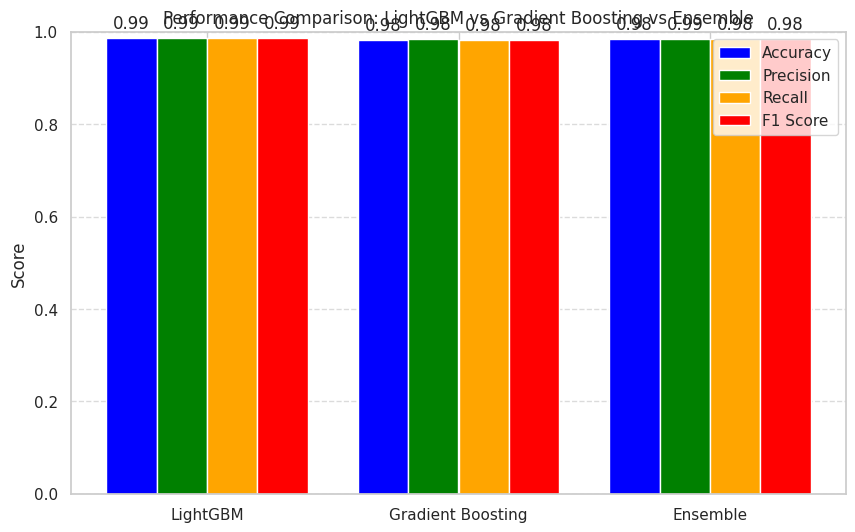

In [ ]:
from sklearn.ensemble import VotingClassifier

# Initialize models
lgbm = LGBMClassifier(n_estimators=100, learning_rate=0.1)
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# Create ensemble model
ensemble_model = VotingClassifier(estimators=[
    ('lgbm', lgbm),
    ('gbm', gbm)
], voting='soft')  # 'soft' for probability-based voting

# Train ensemble model
ensemble_model.fit(X_train, y_train)

# Predictions
y_pred_ensemble = ensemble_model.predict(X_test)

# Calculate metrics
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
precision_ensemble = precision_score(y_test, y_pred_ensemble, average='weighted')
recall_ensemble = recall_score(y_test, y_pred_ensemble, average='weighted')
f1_ensemble = f1_score(y_test, y_pred_ensemble, average='weighted')

# Print results
print("📌 Ensemble Model Performance:")
print(f"🔹 Accuracy: {accuracy_ensemble:.4f}")
print(f"🔹 Precision: {precision_ensemble:.4f}")
print(f"🔹 Recall: {recall_ensemble:.4f}")
print(f"🔹 F1 Score: {f1_ensemble:.4f}")

# Plot comparison of models
models = ["LightGBM", "Gradient Boosting", "Ensemble"]
accuracies = [accuracy_lgbm, accuracy_gbm, accuracy_ensemble]
precisions = [precision_lgbm, precision_gbm, precision_ensemble]
recalls = [recall_lgbm, recall_gbm, recall_ensemble]
f1_scores = [f1_lgbm, f1_gbm, f1_ensemble]

x = np.arange(len(models))  # Label locations

plt.figure(figsize=(10, 6))
plt.bar(x - 0.3, accuracies, width=0.2, label="Accuracy", color="blue")
plt.bar(x - 0.1, precisions, width=0.2, label="Precision", color="green")
plt.bar(x + 0.1, recalls, width=0.2, label="Recall", color="orange")
plt.bar(x + 0.3, f1_scores, width=0.2, label="F1 Score", color="red")

plt.xticks(x, models)
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Performance Comparison: LightGBM vs Gradient Boosting vs Ensemble")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show values on top of bars
for i in range(len(models)):
    plt.text(i - 0.3, accuracies[i] + 0.02, f"{accuracies[i]:.2f}", ha='center')
    plt.text(i - 0.1, precisions[i] + 0.02, f"{precisions[i]:.2f}", ha='center')
    plt.text(i + 0.1, recalls[i] + 0.02, f"{recalls[i]:.2f}", ha='center')
    plt.text(i + 0.3, f1_scores[i] + 0.02, f"{f1_scores[i]:.2f}", ha='center')

plt.show()


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define base models
base_models = [
    ('lgbm', LGBMClassifier(n_estimators=100, learning_rate=0.1)),
    ('gbm', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3))
]

# Define meta-model
meta_model = LogisticRegression()

# Create stacking classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train model
stacking_model.fit(X_train, y_train)

# Predictions
y_pred_stack = stacking_model.predict(X_test)

# Calculate metrics
accuracy_stack = accuracy_score(y_test, y_pred_stack)
precision_stack = precision_score(y_test, y_pred_stack, average='weighted')
recall_stack = recall_score(y_test, y_pred_stack, average='weighted')
f1_stack = f1_score(y_test, y_pred_stack, average='weighted')

# Print results
print("📌 Stacking Model Performance:")
print(f"🔹 Accuracy: {accuracy_stack:.4f}")
print(f"🔹 Precision: {precision_stack:.4f}")
print(f"🔹 Recall: {recall_stack:.4f}")
print(f"🔹 F1 Score: {f1_stack:.4f}")


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

# Define parameter grid for LightGBM
param_grid_lgbm = {
    'n_estimators': [100, 300, 500],  # Number of trees
    'learning_rate': [0.01, 0.05, 0.1],  # Step size
    'max_depth': [3, 5, 7],  # Tree depth
    'num_leaves': [20, 31, 40],  # Leaf nodes
    'min_child_samples': [10, 20, 30]  # Minimum data in leaf
}

# Initialize model
lgbm = LGBMClassifier()

# Grid search
grid_search_lgbm = GridSearchCV(lgbm, param_grid_lgbm, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=2)
grid_search_lgbm.fit(X_train, y_train)

# Best parameters & model
best_lgbm = grid_search_lgbm.best_estimator_
print(f"✅ Best LightGBM Parameters: {grid_search_lgbm.best_params_}")

# Predictions
y_pred_lgbm_best = best_lgbm.predict(X_test)

# Metrics
accuracy_lgbm_best = accuracy_score(y_test, y_pred_lgbm_best)
precision_lgbm_best = precision_score(y_test, y_pred_lgbm_best, average='weighted')
recall_lgbm_best = recall_score(y_test, y_pred_lgbm_best, average='weighted')
f1_lgbm_best = f1_score(y_test, y_pred_lgbm_best, average='weighted')

print("📌 Tuned LightGBM Model Performance:")
print(f"🔹 Accuracy: {accuracy_lgbm_best:.4f}")
print(f"🔹 Precision: {precision_lgbm_best:.4f}")
print(f"🔹 Recall: {recall_lgbm_best:.4f}")
print(f"🔹 F1 Score: {f1_lgbm_best:.4f}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Define parameter grid for Gradient Boosting
param_grid_gbm = {
    'n_estimators': [100, 300, 500],  # Number of trees
    'learning_rate': [0.01, 0.05, 0.1],  # Step size
    'max_depth': [3, 5, 7],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Min samples to split
    'min_samples_leaf': [1, 2, 4]  # Min samples in a leaf
}

# Initialize model
gbm = GradientBoostingClassifier()

# Grid search
grid_search_gbm = GridSearchCV(gbm, param_grid_gbm, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=2)
grid_search_gbm.fit(X_train, y_train)

# Best parameters & model
best_gbm = grid_search_gbm.best_estimator_
print(f"✅ Best Gradient Boosting Parameters: {grid_search_gbm.best_params_}")

# Predictions
y_pred_gbm_best = best_gbm.predict(X_test)

# Metrics
accuracy_gbm_best = accuracy_score(y_test, y_pred_gbm_best)
precision_gbm_best = precision_score(y_test, y_pred_gbm_best, average='weighted')
recall_gbm_best = recall_score(y_test, y_pred_gbm_best, average='weighted')
f1_gbm_best = f1_score(y_test, y_pred_gbm_best, average='weighted')

print("📌 Tuned Gradient Boosting Model Performance:")
print(f"🔹 Accuracy: {accuracy_gbm_best:.4f}")
print(f"🔹 Precision: {precision_gbm_best:.4f}")
print(f"🔹 Recall: {recall_gbm_best:.4f}")
print(f"🔹 F1 Score: {f1_gbm_best:.4f}")


In [ ]:
from sklearn.metrics import matthews_corrcoef, mean_squared_error
import numpy as np

# MCC
mcc_lgbm = matthews_corrcoef(y_test, y_pred_lgbm_best)
mcc_gbm = matthews_corrcoef(y_test, y_pred_gbm_best)

# RMSE & MSE
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm_best)
rmse_lgbm = np.sqrt(mse_lgbm)

mse_gbm = mean_squared_error(y_test, y_pred_gbm_best)
rmse_gbm = np.sqrt(mse_gbm)

# Print Results
print("📌 Additional Metrics:")
print(f"🔹 LightGBM - MCC: {mcc_lgbm:.4f}, MSE: {mse_lgbm:.4f}, RMSE: {rmse_lgbm:.4f}")
print(f"🔹 Gradient Boosting - MCC: {mcc_gbm:.4f}, MSE: {mse_gbm:.4f}, RMSE: {rmse_gbm:.4f}")


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrices
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm_best)
cm_gbm = confusion_matrix(y_test, y_pred_gbm_best)

# Plot Confusion Matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# LightGBM
ConfusionMatrixDisplay(cm_lgbm).plot(ax=ax[0], cmap="Blues")
ax[0].set_title("LightGBM Confusion Matrix")

# Gradient Boosting
ConfusionMatrixDisplay(cm_gbm).plot(ax=ax[1], cmap="Blues")
ax[1].set_title("Gradient Boosting Confusion Matrix")

plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Convert labels to binary (one-vs-rest for multiclass)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_lgbm_prob = best_lgbm.predict_proba(X_test)
y_pred_gbm_prob = best_gbm.predict_proba(X_test)

# Plot ROC-AUC curve
plt.figure(figsize=(8, 6))

for i in range(y_test_bin.shape[1]):  # Loop for each class
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_lgbm_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"LightGBM Class {i} (AUC = {roc_auc:.2f})")

    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_gbm_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linestyle="--", label=f"Gradient Boosting Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.grid()
plt.show()


In [ ]:
importances_lgbm = best_lgbm.feature_importances_
importances_gbm = best_gbm.feature_importances_

# Plot feature importance
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# LightGBM Feature Importance
ax[0].barh(range(len(importances_lgbm)), importances_lgbm, color="blue")
ax[0].set_yticks(range(len(importances_lgbm)))
ax[0].set_yticklabels(X_train.columns)
ax[0].set_title("LightGBM Feature Importance")

# Gradient Boosting Feature Importance
ax[1].barh(range(len(importances_gbm)), importances_gbm, color="green")
ax[1].set_yticks(range(len(importances_gbm)))
ax[1].set_yticklabels(X_train.columns)
ax[1].set_title("Gradient Boosting Feature Importance")

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve, mean_squared_error,
    matthews_corrcoef
)
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
# Standardize the features (important for models like SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
lgbm = LGBMClassifier(n_estimators=100, learning_rate=0.1)
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)


In [ ]:
ensemble_model = VotingClassifier(estimators=[
    ('lgbm', lgbm),
    ('gbm', gbm)
], voting='soft')


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Use Randomized Search for LGBM (faster than Grid Search)
lgbm_random_search = RandomizedSearchCV(LGBMClassifier(), lgbm_param_grid, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
lgbm_random_search.fit(X_train, y_train)

# Use Randomized Search for GBM
gbm_random_search = RandomizedSearchCV(GradientBoostingClassifier(), gbm_param_grid, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
gbm_random_search.fit(X_train, y_train)

# ✅ Get best models
best_lgbm = lgbm_random_search.best_estimator_
best_gbm = gbm_random_search.best_estimator_

print("✅ Best LGBM Parameters:", lgbm_random_search.best_params_)
print("✅ Best GBM Parameters:", gbm_random_search.best_params_)


KeyboardInterrupt: 

In [ ]:
# Train models
lgbm.fit(X_train, y_train)
gbm.fit(X_train, y_train)
ensemble_model.fit(X_train, y_train)

# Predictions
y_pred_lgbm = lgbm.predict(X_test)
y_pred_gbm = gbm.predict(X_test)
y_pred_ensemble = ensemble_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1339
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.169004
[LightGBM] [Info] Start training from score -3.182610
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.018722
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -2.984433
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.078620
[LightGBM] 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000235 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1339
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.169004
[LightGBM] [Info] Start training from score -3.182610
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.018722
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -2.984433
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.078620
[LightGBM] 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
def evaluate_model(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    mcc = matthews_corrcoef(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"\n📌 {model_name} Performance:")
    print(f"🔹 Accuracy: {acc:.4f}")
    print(f"🔹 Precision: {prec:.4f}")
    print(f"🔹 Recall: {rec:.4f}")
    print(f"🔹 F1 Score: {f1:.4f}")
    print(f"✔ MCC: {mcc:.4f}")
    print(f"✔ MSE: {mse:.4f}")
    print(f"✔ RMSE: {rmse:.4f}")


In [ ]:
evaluate_model(y_test, y_pred_lgbm, "LightGBM")
evaluate_model(y_test, y_pred_gbm, "Gradient Boosting")
evaluate_model(y_test, y_pred_ensemble, "Ensemble Model")



📌 LightGBM Performance:
🔹 Accuracy: 0.9864
🔹 Precision: 0.9877
🔹 Recall: 0.9864
🔹 F1 Score: 0.9864
✔ MCC: 0.9857
✔ MSE: 0.9591
✔ RMSE: 0.9793

📌 Gradient Boosting Performance:
🔹 Accuracy: 0.9818
🔹 Precision: 0.9843
🔹 Recall: 0.9818
🔹 F1 Score: 0.9819
✔ MCC: 0.9810
✔ MSE: 2.0045
✔ RMSE: 1.4158

📌 Ensemble Model Performance:
🔹 Accuracy: 0.9841
🔹 Precision: 0.9854
🔹 Recall: 0.9841
🔹 F1 Score: 0.9841
✔ MCC: 0.9834
✔ MSE: 1.4318
✔ RMSE: 1.1966


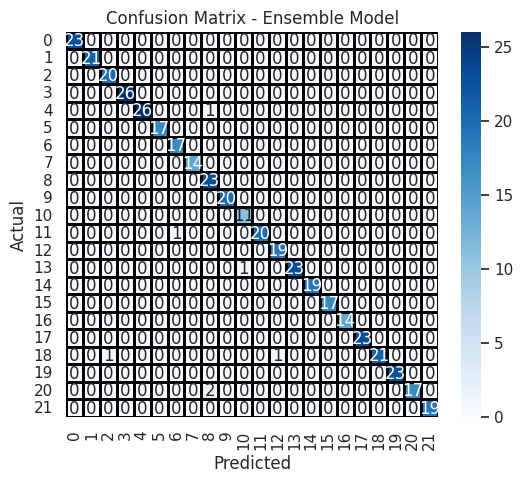

In [ ]:
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", linewidths=1, linecolor='black')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

plot_confusion_matrix(y_test, y_pred_ensemble, "Ensemble Model")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


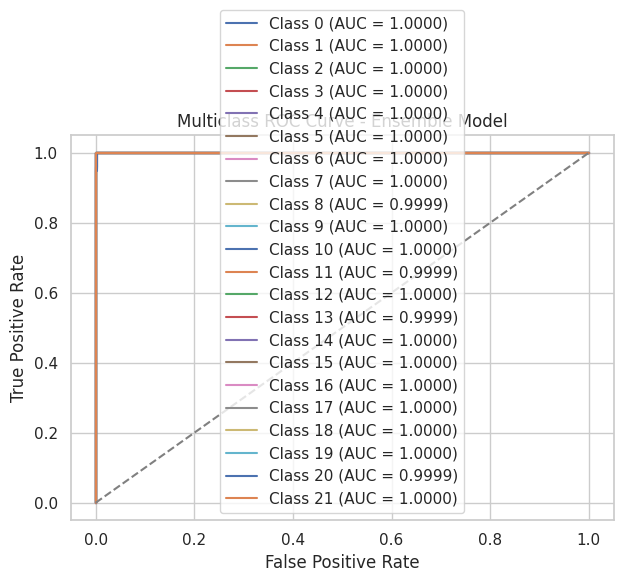

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

def plot_multiclass_roc(model, X_test, y_test, model_name):
    # Binarize the output (convert to one-hot encoding)
    n_classes = len(np.unique(y_test))
    y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

    # Get probability estimates for each class
    y_prob = model.predict_proba(X_test)

    # Compute ROC curve and AUC for each class
    plt.figure(figsize=(7, 5))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc_score:.4f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random guess line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Multiclass ROC Curve - {model_name}')
    plt.legend()
    plt.show()

# Call the function
plot_multiclass_roc(ensemble_model, X_test, y_test, "Ensemble Model")


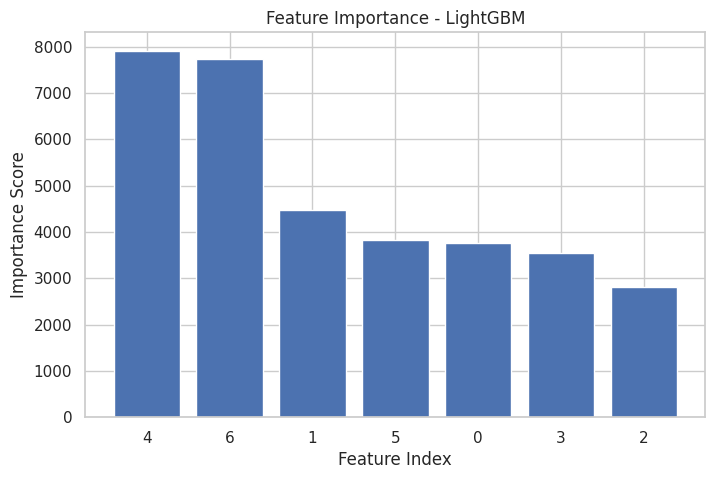

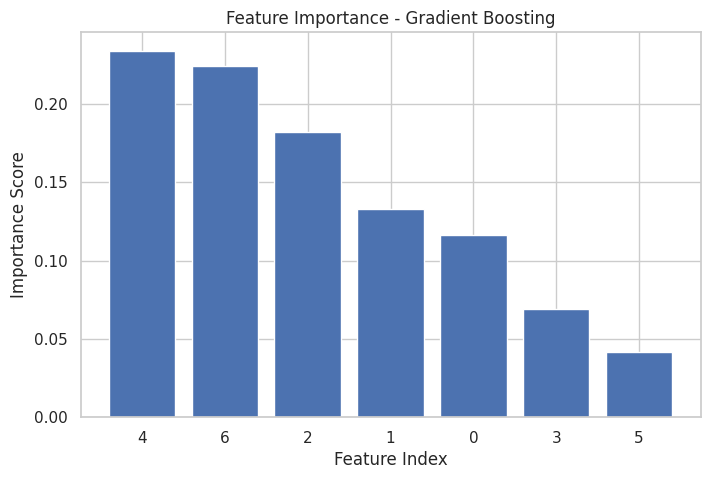

In [ ]:
# Feature Importance (for LGBM & GBM)
def plot_feature_importance(model, model_name):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(8, 5))
    plt.bar(range(len(importances)), importances[indices], align="center")
    plt.xticks(range(len(importances)), indices)
    plt.xlabel("Feature Index")
    plt.ylabel("Importance Score")
    plt.title(f"Feature Importance - {model_name}")
    plt.show()

plot_feature_importance(lgbm, "LightGBM")
plot_feature_importance(gbm, "Gradient Boosting")

In [ ]:
!pip install catboost lightgbm scikit-learn

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# 🔹 Define hyperparameter grids
lgbm_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [20, 31, 40],
    'min_child_samples': [10, 20, 30]
}

catboost_params = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [3, 5, 7],
    'l2_leaf_reg': [3, 5, 7]
}

gbm_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10]
}


In [ ]:
# 🔹 LightGBM Tuning
lgbm = LGBMClassifier()
lgbm_search = RandomizedSearchCV(lgbm, lgbm_params, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
lgbm_search.fit(X_train, y_train)
best_lgbm = lgbm_search.best_estimator_

# 🔹 CatBoost Tuning
catboost = CatBoostClassifier(verbose=0)
catboost_search = RandomizedSearchCV(catboost, catboost_params, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
catboost_search.fit(X_train, y_train)
best_catboost = catboost_search.best_estimator_

# 🔹 Gradient Boosting Tuning
gbm = GradientBoostingClassifier()
gbm_search = RandomizedSearchCV(gbm, gbm_params, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
gbm_search.fit(X_train, y_train)
best_gbm = gbm_search.best_estimator_

# ✅ Print best parameters
print("✅ Best LGBM Parameters:", lgbm_search.best_params_)
print("✅ Best CatBoost Parameters:", catboost_search.best_params_)
print("✅ Best GBM Parameters:", gbm_search.best_params_)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1339
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.169004
[LightGBM] [Info] Start training from score -3.182610
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.018722
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -2.984433
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.078620
[LightGBM] 

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 🔹 Predictions
y_pred = ensemble_model.predict(X_test)

# 🔹 Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# 🔹 Print Metrics
print(f"📌 Final Ensemble Accuracy: {accuracy:.4f}")
print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall: {recall:.4f}")
print(f"🔹 F1 Score: {f1:.4f}")
print("🔹 Classification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


📌 Final Ensemble Accuracy: 0.9886
🔹 Precision: 0.9894
🔹 Recall: 0.9886
🔹 F1 Score: 0.9886
🔹 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


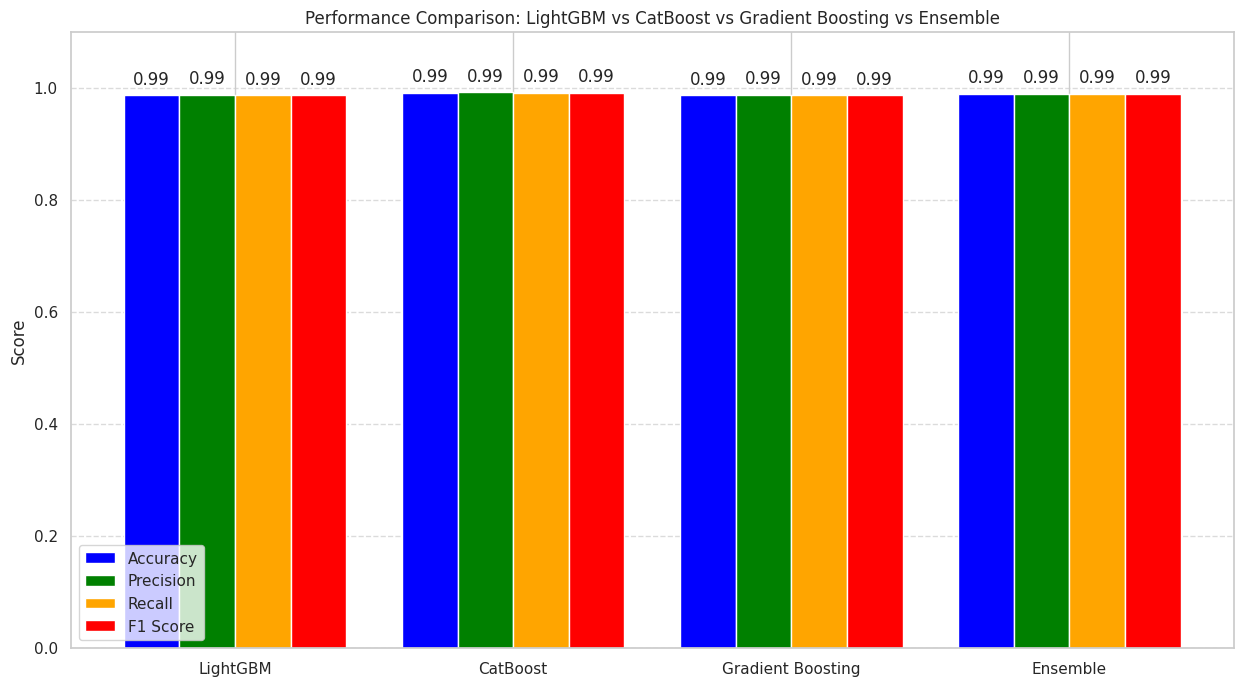

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 🔹 Calculate individual model scores
models = ["LightGBM", "CatBoost", "Gradient Boosting", "Ensemble"]
accuracies = [
    accuracy_score(y_test, best_lgbm.predict(X_test)),
    accuracy_score(y_test, best_catboost.predict(X_test)),
    accuracy_score(y_test, best_gbm.predict(X_test)),
    accuracy
]
precisions = [
    precision_score(y_test, best_lgbm.predict(X_test), average='weighted'),
    precision_score(y_test, best_catboost.predict(X_test), average='weighted'),
    precision_score(y_test, best_gbm.predict(X_test), average='weighted'),
    precision
]
recalls = [
    recall_score(y_test, best_lgbm.predict(X_test), average='weighted'),
    recall_score(y_test, best_catboost.predict(X_test), average='weighted'),
    recall_score(y_test, best_gbm.predict(X_test), average='weighted'),
    recall
]
f1_scores = [
    f1_score(y_test, best_lgbm.predict(X_test), average='weighted'),
    f1_score(y_test, best_catboost.predict(X_test), average='weighted'),
    f1_score(y_test, best_gbm.predict(X_test), average='weighted'),
    f1
]

x = np.arange(len(models))  # Label locations

plt.figure(figsize=(15, 8))
plt.bar(x - 0.3, accuracies, width=0.2, label="Accuracy", color="blue")
plt.bar(x - 0.1, precisions, width=0.2, label="Precision", color="green")
plt.bar(x + 0.1, recalls, width=0.2, label="Recall", color="orange")
plt.bar(x + 0.3, f1_scores, width=0.2, label="F1 Score", color="red")

plt.xticks(x, models)
plt.ylim(0, 1.1)
plt.ylabel("Score")
plt.title("Performance Comparison: LightGBM vs CatBoost vs Gradient Boosting vs Ensemble")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show values on top of bars
for i in range(len(models)):
    plt.text(i - 0.3, accuracies[i] + 0.02, f"{accuracies[i]:.2f}", ha='center')
    plt.text(i - 0.1, precisions[i] + 0.02, f"{precisions[i]:.2f}", ha='center')
    plt.text(i + 0.1, recalls[i] + 0.02, f"{recalls[i]:.2f}", ha='center')
    plt.text(i + 0.3, f1_scores[i] + 0.02, f"{f1_scores[i]:.2f}", ha='center')

plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


✅ Multiclass ROC-AUC Score (OVR): 1.0000


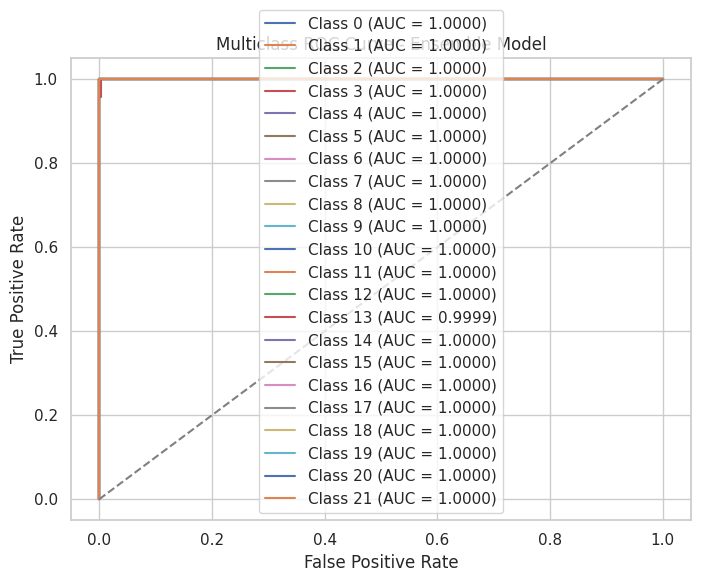

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression  # Required for OVR method

# 🔹 Convert y_test to one-hot encoding
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# 🔹 Get predicted probabilities for all classes
y_prob = ensemble_model.predict_proba(X_test)

# 🔹 Compute ROC-AUC score (One-vs-Rest)
auc_score = roc_auc_score(y_test_binarized, y_prob, average="macro", multi_class="ovr")
print(f"✅ Multiclass ROC-AUC Score (OVR): {auc_score:.4f}")

# 🔹 Compute ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc_score(y_test_binarized[:, i], y_prob[:, i]):.4f})')

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve - Ensemble Model")
plt.legend()
plt.show()


✅ Matthews Correlation Coefficient (MCC): 0.9881
✅ MSE: 1.3136, RMSE: 1.1461


<ipython-input-61-c1b2d0d0a7cb>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette="Blues_r")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


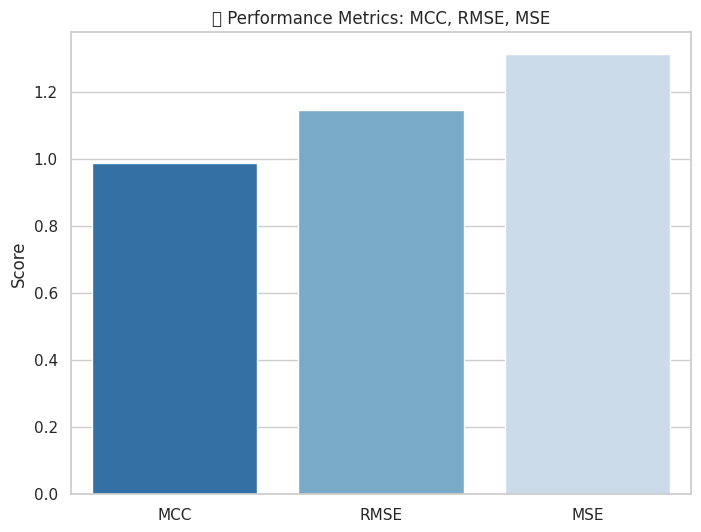

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import matthews_corrcoef, mean_squared_error

# 🔹 MCC Score
mcc = matthews_corrcoef(y_test, y_pred)
print(f"✅ Matthews Correlation Coefficient (MCC): {mcc:.4f}")

# 🔹 RMSE & MSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"✅ MSE: {mse:.4f}, RMSE: {rmse:.4f}")

# 🔹 Create Bar Plot for MCC, RMSE, and MSE
metrics = ['MCC', 'RMSE', 'MSE']
values = [mcc, rmse, mse]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=values, palette="Blues_r")

# Adding labels and title
plt.ylabel('Score')
plt.title('🔹 Performance Metrics: MCC, RMSE, MSE')

# Show the plot
plt.show()


<ipython-input-62-9c14d896a08e>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="Blues_r")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


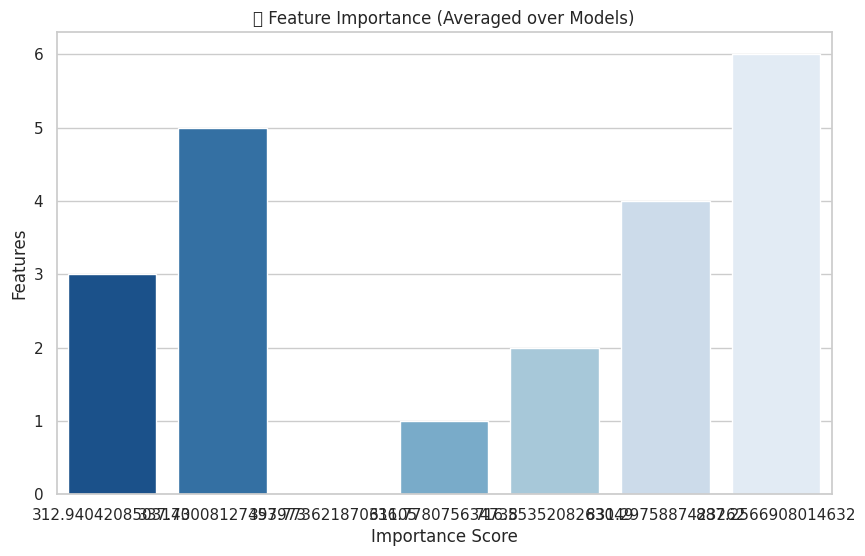

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import matthews_corrcoef, mean_squared_error


# 🔹 Feature Importance (Averaged over all models)
feature_importances = np.zeros(X_train.shape[1])

# Convert X_train to DataFrame (if it's not already)
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train)

# Get feature importance from each model
models = {'LGBM': best_lgbm, 'CatBoost': best_catboost, 'GBM': best_gbm}
for name, model in models.items():
    try:
        importance = model.feature_importances_
        feature_importances += importance  # Accumulate importance scores
    except AttributeError:
        print(f"⚠ {name} does not have feature_importances_ attribute")

# 🔹 Normalize feature importance
feature_importances /= len(models)

# 🔹 Create DataFrame for plotting
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 🔹 Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="Blues_r")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("🔹 Feature Importance (Averaged over Models)")
plt.show()
